In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(350)

In [8]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[(df["clean_comment"].str.strip()=="")]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [11]:
df = df[~(df["clean_comment"].str.strip()=="")]

In [12]:
df["clean_comment"]=df["clean_comment"].str.lower()

In [13]:
df[df["clean_comment"].apply(lambda x: x.endswith(" ") or x.startswith(" "))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [14]:
df["clean_comment"] = df["clean_comment"].str.strip()

In [15]:
comments_with_newline = df[df["clean_comment"].str.contains("\n")]

comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [16]:
df["clean_comment"] = df["clean_comment"].str.replace("\n" , " ", regex=True)

<Axes: xlabel='category', ylabel='count'>

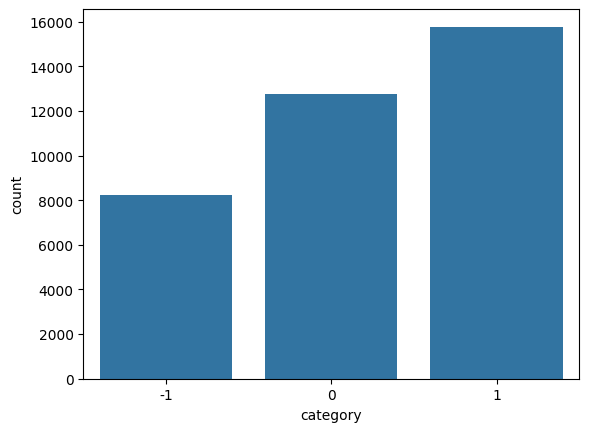

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x="category")

In [28]:
df["word_count"] = df["clean_comment"].apply(lambda x: len(x.split()))

In [29]:
df.word_count.describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

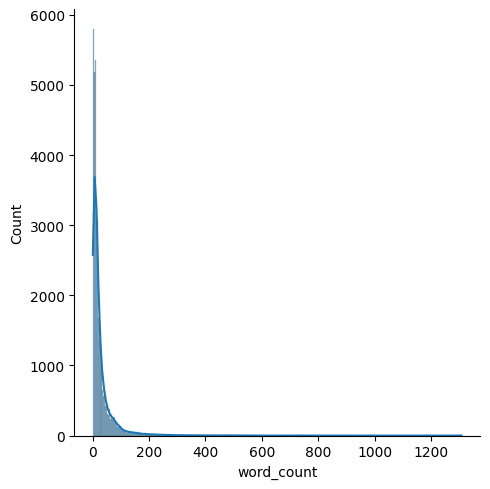

In [30]:
sns.displot(df["word_count"],kde=True)

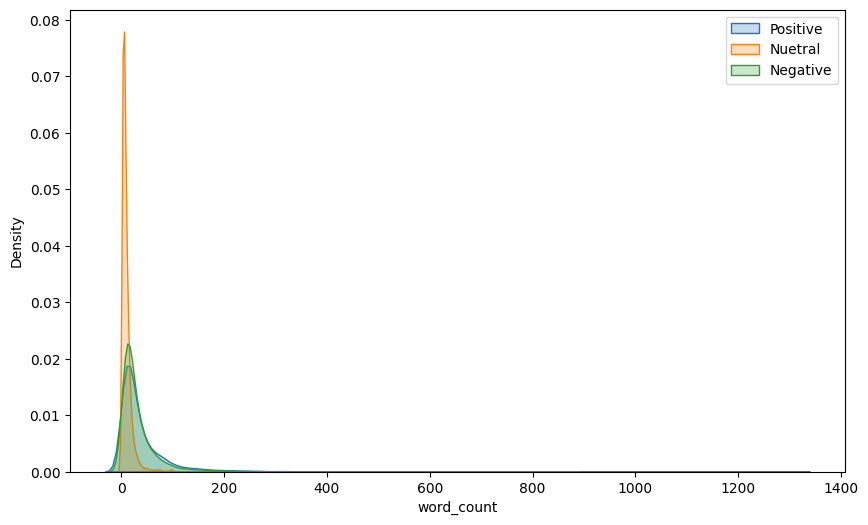

In [31]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df.category ==1]["word_count"],label="Positive",fill=True)
sns.kdeplot(df[df.category ==0]["word_count"],label="Nuetral",fill=True)
sns.kdeplot(df[df.category ==-1]["word_count"],label="Negative",fill=True)


plt.legend()
plt.show()

In [34]:
from nltk.corpus import stopwords

import nltk
nltk.download("stopwords")


stop_words=set(stopwords.words("english"))

df["num_stop_words"] = df["clean_comment"].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alqud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
1245,don even get how some people can admire this guy,0,10,5
26871,politics india terms electoral choice moribund...,1,204,59
3826,thats the release date days with destiny are over,0,9,4
25265,little silly suggest that all time spent readi...,-1,31,8
36509,kursi pakado,0,2,0


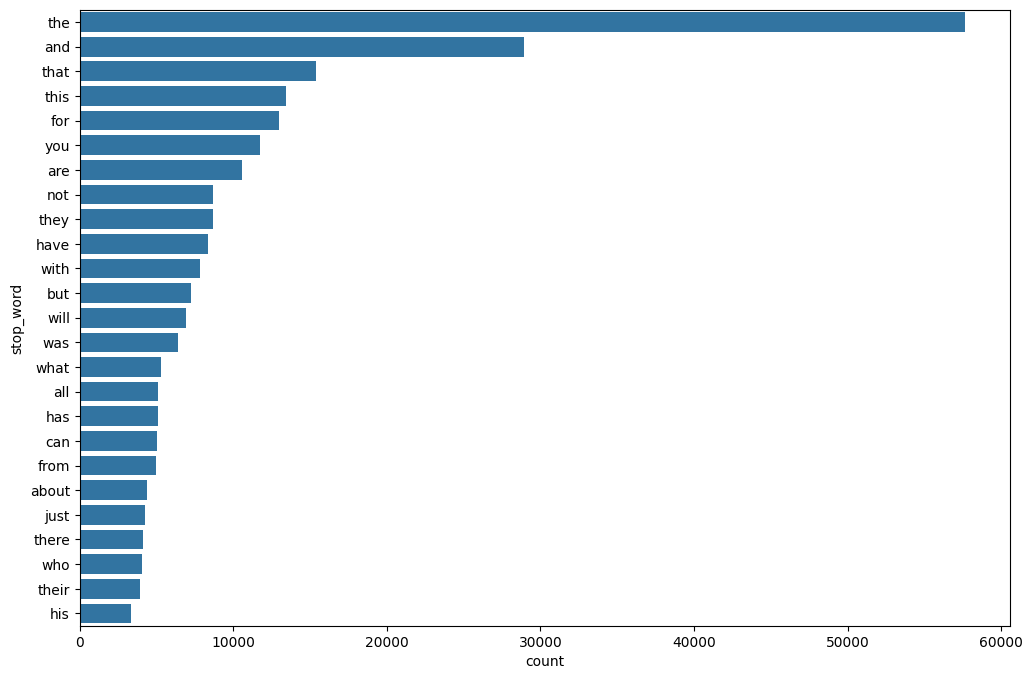

In [39]:
from collections import Counter

all_stop_words =[word for comment in df.clean_comment for word in comment.split() if word in stop_words]

most_common_stop_words = Counter(all_stop_words).most_common(25)

top_25_df = pd.DataFrame(most_common_stop_words,columns=["stop_word","count"])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_df,x="count",y='stop_word')
plt.show()

In [40]:
df["num_chars"] = df.clean_comment.apply(len)

In [41]:
df.num_chars.describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [43]:
from collections import Counter

all_text = " ".join(df["clean_comment"])

char_freq = Counter(all_text)

char_freq = pd.DataFrame(char_freq.items(),columns=["char", "freq"]).sort_values(by="freq")

C:\Users\alqud\AppData\Local\Temp\ipykernel_7128\1012993805.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


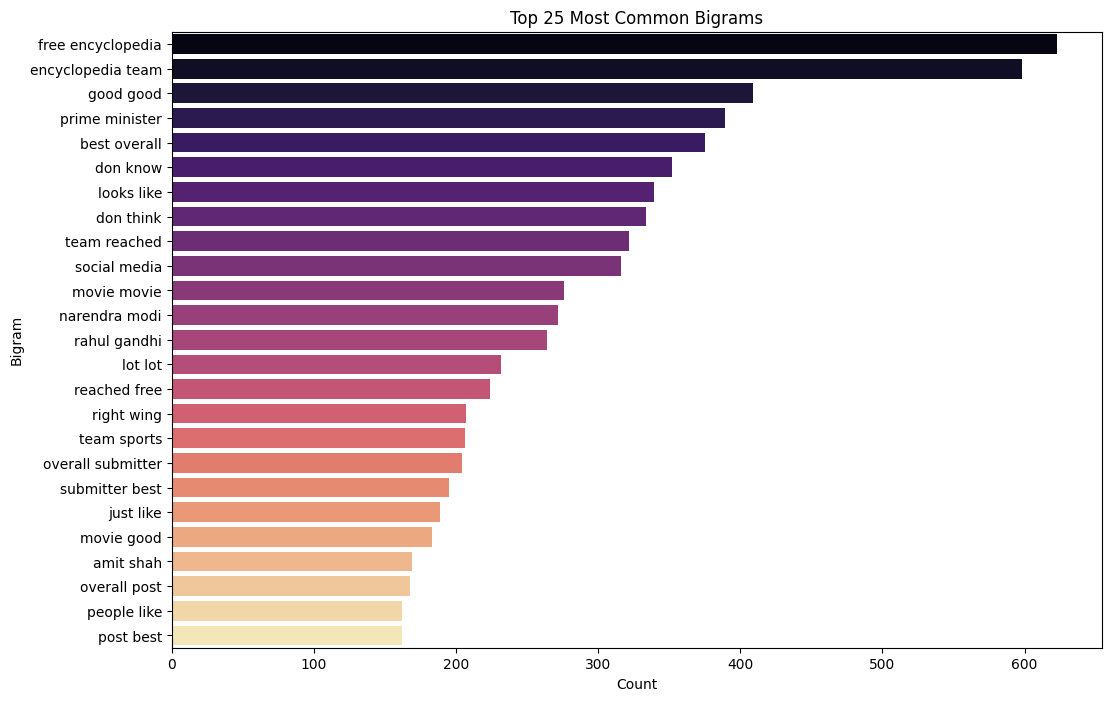

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\alqud\AppData\Local\Temp\ipykernel_7128\2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


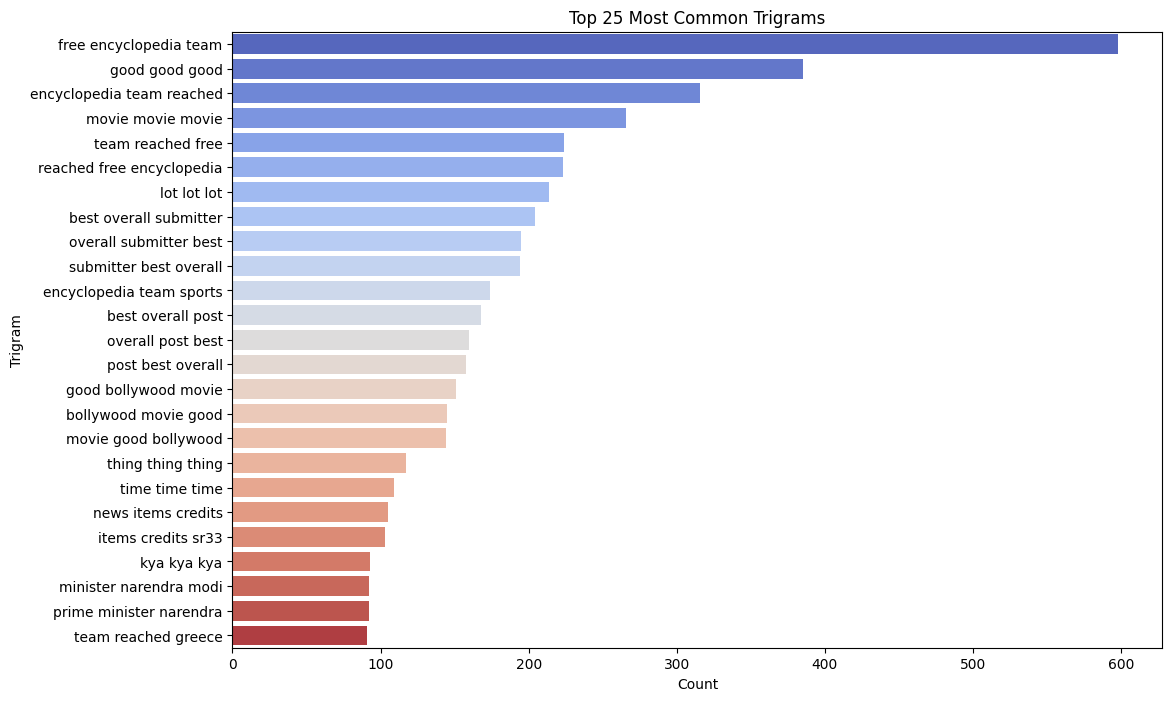

In [45]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [46]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english")) -{"not","but","however","no","yet"}

df["clean_comment"] = df["clean_comment"].apply(lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words]))

In [47]:
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(

    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alqud\AppData\Roaming\nltk_data...


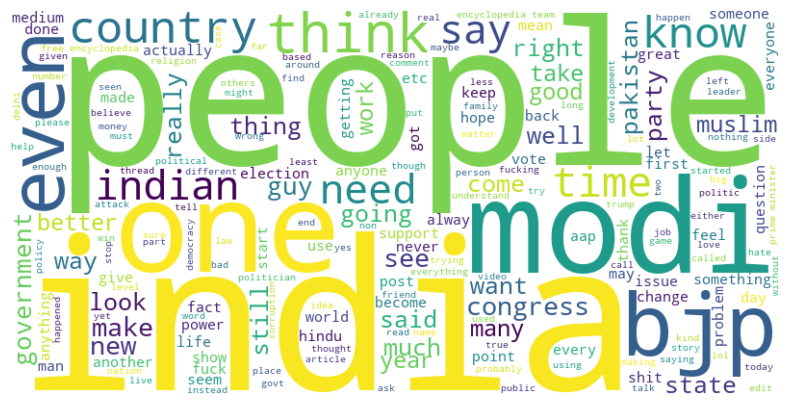

In [50]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800,height=400,background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

plot_word_cloud(df["clean_comment"])